### Data Cleaning

In [17]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in the data
train = pd.read_csv('./datasets/loans_full_schema.csv')
train.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [3]:
# Get some summary statistics
train.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [4]:
# Get data type info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [6]:
# Check for null values
train.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [8]:
# Check out the loan status column class distribution
train['loan_status'].value_counts()

Current               9375
Fully Paid             447
In Grace Period         67
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: loan_status, dtype: int64

In [9]:
# Check dimensionality of dataset
train.shape

(10000, 55)

In [10]:
# Made new column with train loanStatus of 'Fully Paid'
train['fully_paid'] = (train['loan_status'] == 'Fully Paid').astype(int)
# Check to see if additional column is there
train.shape

(10000, 56)

In [12]:
# Checking class distribution of fully paid column
train['fully_paid'].value_counts()

0    9553
1     447
Name: fully_paid, dtype: int64

In [13]:
# Correlation Calculation
# Finding columns with correlation to the fully paid column 
# paid_total and paid_principal have the highest correlations with fully paid
train.corrwith(train["fully_paid"])

<ipython-input-13-3f8af3078e70>:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corrwith(train["fully_paid"])


emp_length                         -0.000243
annual_income                       0.024685
debt_to_income                     -0.026296
annual_income_joint                 0.023309
debt_to_income_joint               -0.055108
delinq_2y                           0.001025
months_since_last_delinq           -0.030919
earliest_credit_line               -0.004261
inquiries_last_12m                  0.026165
total_credit_lines                  0.034537
open_credit_lines                  -0.002207
total_credit_limit                  0.029942
total_credit_utilized               0.014517
num_collections_last_12m            0.010829
num_historical_failed_to_pay       -0.002599
months_since_90d_late               0.011260
current_accounts_delinq            -0.002163
total_collection_amount_ever       -0.005369
current_installment_accounts       -0.006698
accounts_opened_24m                 0.038746
months_since_last_credit_inquiry   -0.028593
num_satisfactory_accounts          -0.001791
num_accoun

### Data Visualizations and EDA

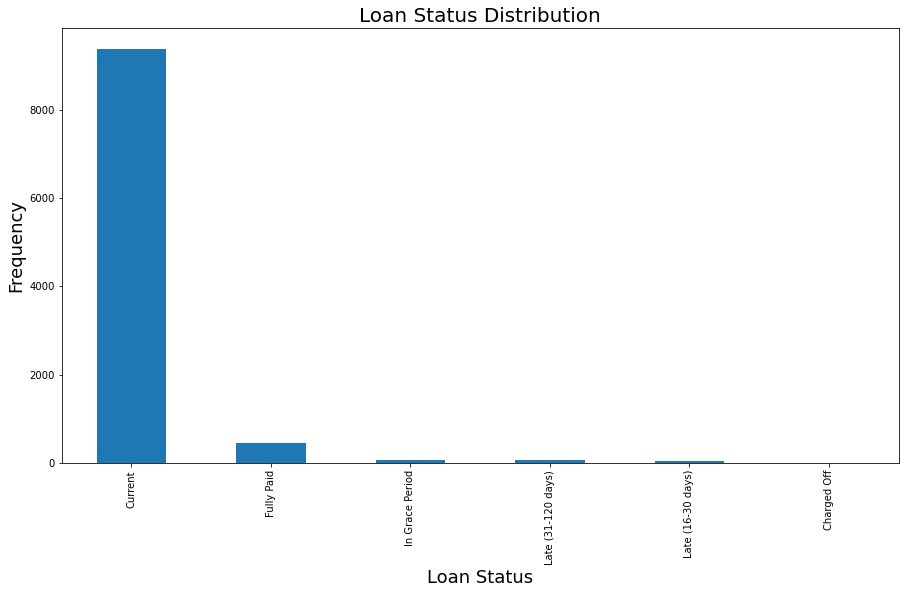

In [64]:
# Bar plot of Loan Status 
# Visualize class imbalance for all 6 loan statuses
plt.figure(figsize= (15,8));
plt.title('Loan Status Distribution', size =20)
plt.xlabel('Loan Status', size=18)
plt.ylabel('Frequency', size=18)
train['loan_status'].value_counts().plot(kind='bar');

In [18]:
train.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

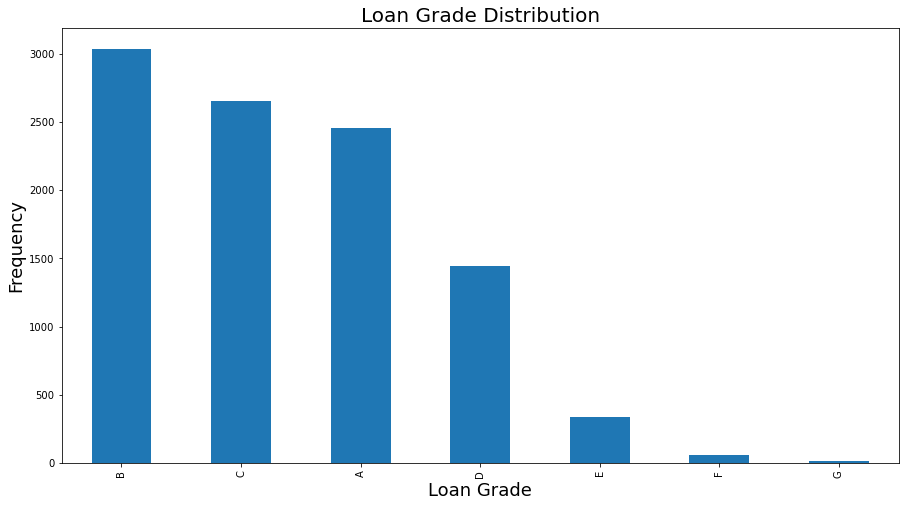

In [87]:
# Bar plot of Loan Grade Distribution
plt.figure(figsize= (15,8));
plt.title('Loan Grade Distribution', size =20)
plt.xlabel('Loan Grade', size=18)
plt.ylabel('Frequency', size=18)
train['grade'].value_counts().plot(kind='bar');

In [69]:
train['state'].nunique()

50

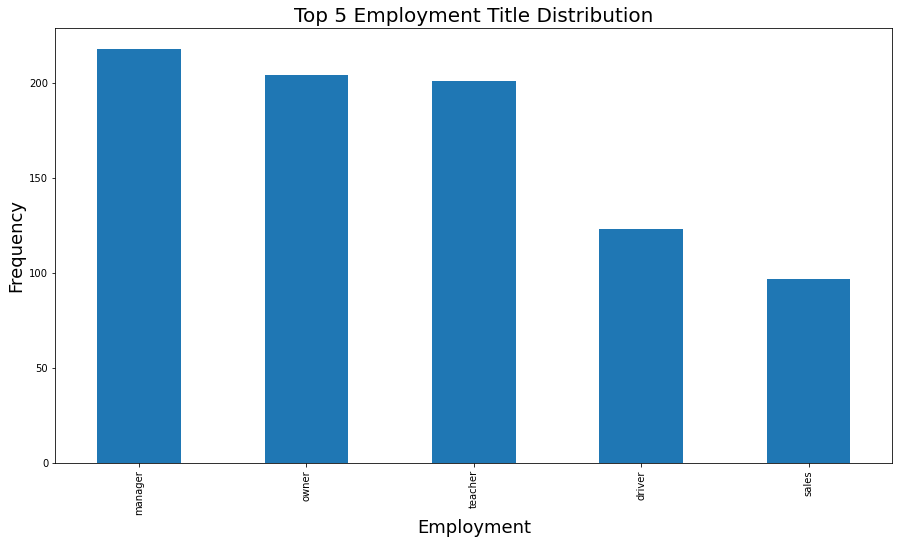

In [90]:
plt.figure(figsize= (15,8));
plt.title('Top 5 Employment Title Distribution', size =20)
plt.xlabel('Employment', size=18)
plt.ylabel('Frequency', size=18)
train['emp_title'].value_counts().head(5).plot(kind='bar');

In [54]:
# Make filtered dataframe with only loan status of fullly paid 
fully_paid = train[train['fully_paid'] == 1]

In [72]:
# 44 states had fully paid loan status
fully_paid['state'].nunique()

44

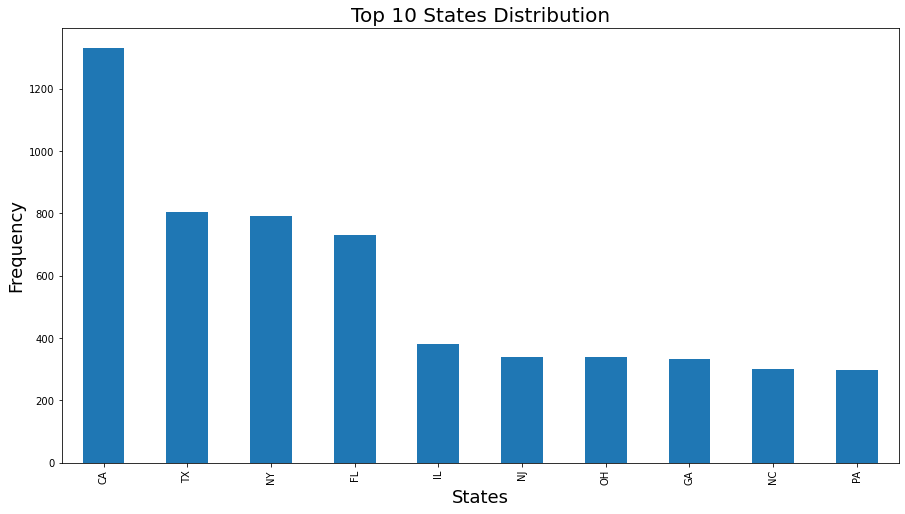

In [85]:
# The top 5 states by frequency
plt.figure(figsize= (15,8));
plt.title('Top 10 States Distribution', size =20)
plt.xlabel('States', size=18)
plt.ylabel('Frequency', size=18)
train['state'].value_counts().head(10).plot(kind='bar');

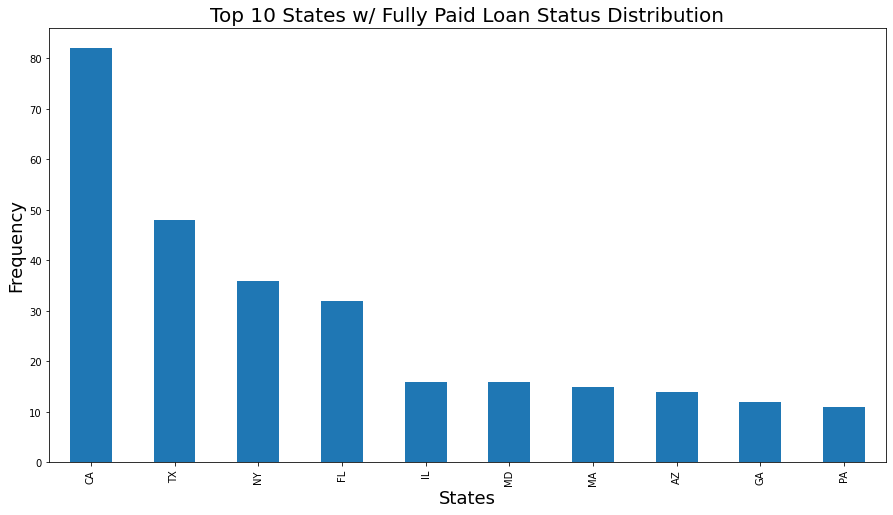

In [86]:
# The top 5 states by fully paid loan status
plt.figure(figsize= (15,8));
plt.title('Top 10 States w/ Fully Paid Loan Status Distribution', size =20)
plt.xlabel('States', size=18)
plt.ylabel('Frequency', size=18)
fully_paid['state'].value_counts().head(10).plot(kind='bar');

### States Bar Charts Distribution Analysis
The bar graphs of the top 10 states by frequency of the whole dataset and the fully paid ones do not have a big difference between the two. <br>
The top 5 states are the same between the two graphs. Besides the graphs being quite similar there is no other noticeable trend to be gathered.

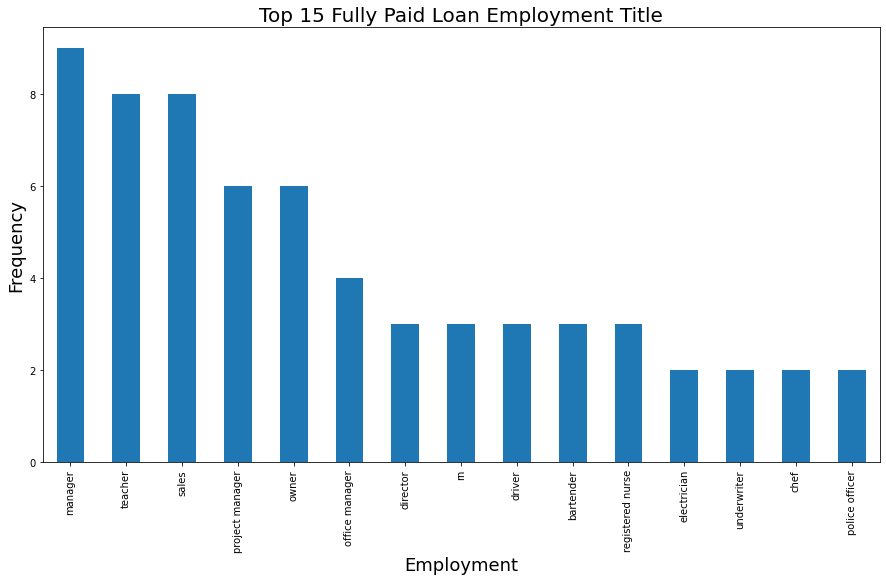

In [63]:
plt.figure(figsize= (15,8));
plt.title('Top 15 Fully Paid Loan Employment Title', size =20)
plt.xlabel('Employment', size=18)
plt.ylabel('Frequency', size=18)
fully_paid['emp_title'].value_counts().head(15).plot(kind='bar');

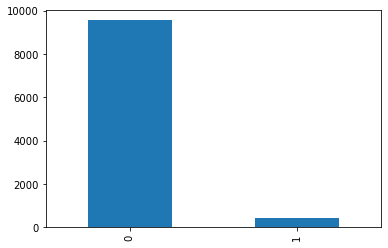

In [27]:
# Imbalanced classes for current (0) and Paid in Full(1)
train['fully_paid'].value_counts().plot(kind='bar');

In [49]:
train['fully_paid'].value_counts()

0    9553
1     447
Name: fully_paid, dtype: int64

In [53]:
train.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,fully_paid
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,0


In [15]:
train.to_csv('datasets/loans_schema_clean.csv', encoding = 'utf-8', index=False)